---
# Applied Machine Learning: Train-Test Split
---

### Import required modules and load data file

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Again, to access the file, you need to mount the drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
fruits = pd.read_csv('data/fruit_data_with_colors.csv', sep="\t")
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [3]:
fruits.shape

(59, 7)

The file contains 59 instances of fruit. I has the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Create train-test split

To create training and test sets from a input dataset, Scikit-learn provides a handy function that will do this split for us, called, not surprisingly, `train_test_split()`. This function randomly shuffles the dataset and splits off a certain percentage of the input samples for use as a training set, and then puts the remaining samples into a different variable for use as a test set.

So in this example, we're using a 75-25% split of training versus test data. That's a pretty standard relative split and a good rule of thumb to use in deciding what proportion of training versus testing.

As a reminder, when we're using Scikit-learn, we'll denote the data that we have using different flavors of the variable `X`, capital X, which is typically a two dimensional array or dataframe. While the notation we'll use for labels will be typically based on lowercase `y`, which is usually a one dimensional array, or a scalar.

Finally, note the use of the random state parameter in the `train_test_split()` function. This random state parameter provides a seed value to the function's internal random number generator. This is to check and validate the data when running the code multiple times. Setting `random_state` to a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.


In [4]:
from sklearn.model_selection import train_test_split

X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
print(y_train.shape)
print(y_test.shape)

(44,)
(15,)


Now that we have a training and a test set, we're ready for the next step.

Let's look more in depth at the data itself before we proceed with giving it to a machine learning algorithm.

### Examining the data

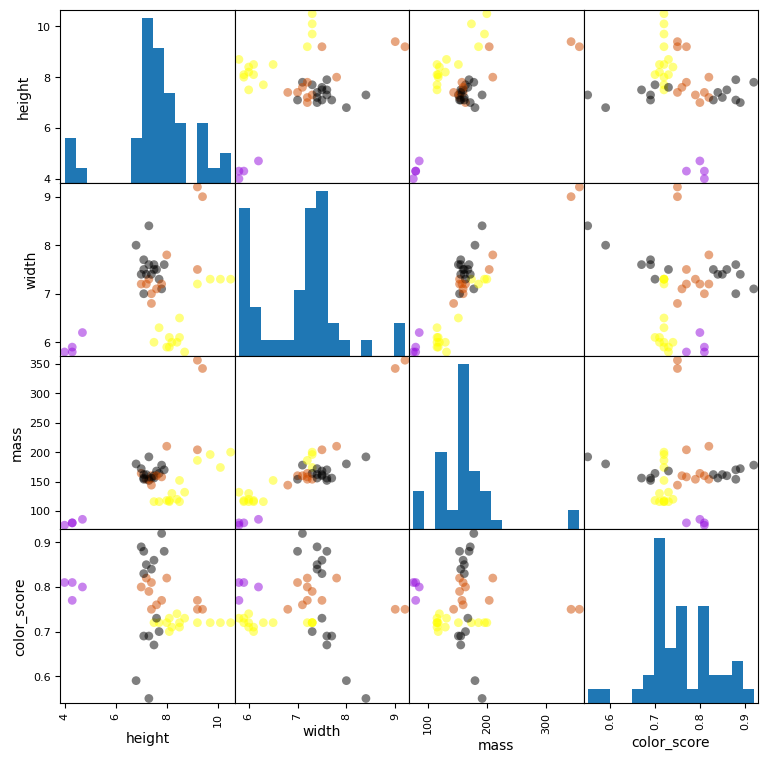

In [6]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, alpha=0.5, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

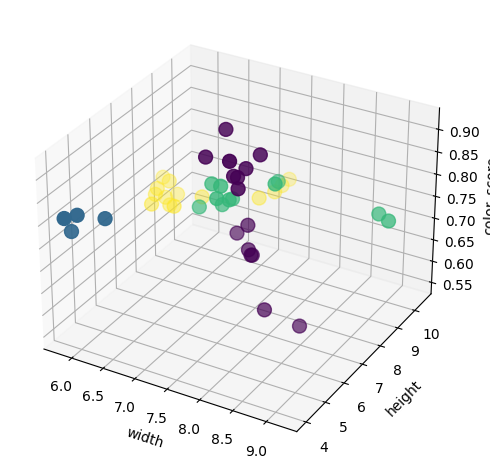

In [7]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.tight_layout()
plt.show()